In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

In [81]:
class Board:
    def __init__(self, n, mat=None):
        self.n = n
        if mat == None:
            mat = []
            for i in range(n):
                mat.append([0 for j in range(n)])
        self.mat = mat
        
    def placequeen(self, r, c):
        self.mat[r][c] = 1
    
    def removequeen(self, r, c):
        self.mat[r][c] = 0
    
    def printboard(self):
        cell = np.ones((143, 143)) * 0.4375
        
        queen1 = Image.open('queencell1.png')
        queen1 = np.asarray(queen1) / 255
        queen1 = queen1[:,:,0]
        queen2 = Image.open('queencell2.png')
        queen2 = np.asarray(queen2) / 255
        queen2 = queen2[:,:,0]
        
        image = np.ones((self.n*143, self.n*143))
        
        for i in range(self.n):
            for j in range(self.n):
                if (i+j) % 2 == 0:
                    image[i*143:(i+1)*143, j*143:(j+1)*143] = cell.copy()
                
                if self.mat[i][j] == 1:
                    if (i+j) % 2 == 0:
                        image[i*143:(i+1)*143, j*143:(j+1)*143] = queen2.copy()
                    else:
                        image[i*143:(i+1)*143, j*143:(j+1)*143] = queen1.copy()
    
        plt.imshow(image, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    def getcopy(self):
        n = self.n
        matrix = []
        for row in self.mat:
            matrix.append([r for r in row])
        
        return Board(n, matrix)            

In [82]:
def solveeightqueens(n):
    soln = []
    
    board = Board(n)
    
    for i in range(board.n):
        board.placequeen(i, 0)
        dfs(board, 1, soln)
        board.removequeen(i, 0)
        
    return soln
        
def dfs(board, col, soln):
    if col == board.n:
        soln.append(board.getcopy())
        return
    
    for i in range(board.n):
        if checkpos(board, (i, col)):
            board.placequeen(i, col)
            dfs(board, col+1, soln)
            board.removequeen(i, col)
    
    
def checkpos(board, pos):
    r, c = pos
    
    for i in range(c):
        if board.mat[r][i] == 1:
            return False
    
    i, j = r-1, c-1
    while i >= 0 and j >= 0:
        if board.mat[i][j] == 1:
            return False
        i -= 1
        j -= 1
    
    i, j = r+1, c-1
    while i < board.n and j >= 0:
        if board.mat[i][j] == 1:
            return False
        i += 1
        j -= 1
        
    return True

In [87]:
soln = solveeightqueens(8)

A possible solution could be:


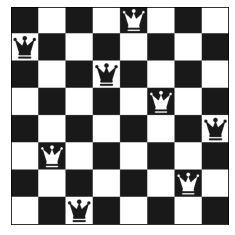

In [88]:
print("A possible solution could be:")
random.choice(soln).printboard()